In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
os.mkdir('Dataset')

In [4]:
width  = 300
height = 200 

In [15]:
# Fuction to take an image and return cropped face
def crop_face(image, color = 'rgb'):
    '''
    Input  : A face image
    Output : Cropped Face
    '''
    
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)                                 # Convert to RGB
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)                             # Create a grayscale copy
    
    # Create a cascade classifier and use detectMultiScale function
    faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = faceCascade.detectMultiScale(img_gray, 1.2, 4)
    
    # Cropping the face
    for x,y,w,h in faces:
        if color == 'rgb':
            face = img[y : y+h, x : x+w]
        elif color == 'gray':
            face = img_gray[y : y+h, x : x+w]
        else:
            print('Incorrect color format')
    
        
    return face

(-0.5, 730.5, 730.5, -0.5)

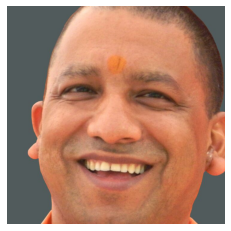

In [20]:
img = cv2.imread('yogiji.jpg')
image = crop_face(img, 'rgb')

plt.imshow(image, 'gray')
plt.axis('off')

(-0.5, 730.5, 730.5, -0.5)

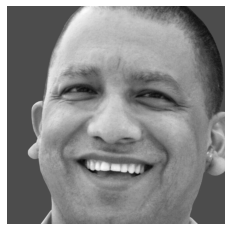

In [21]:
img = cv2.imread('yogiji.jpg')
image = crop_face(img, 'gray')

plt.imshow(image, 'gray')
plt.axis('off')

In [25]:
def create_dataset(path, num_of_images, color):
    count = 1
    while count <= num_of_images:
        webcam = cv2.VideoCapture(0)
        (_, img) = webcam.read()

        face = crop_face(img, color)
        face = cv2.resize(face, (width, height))

        if color == 'rgb':
            cv2.imwrite('{}/face{}.jpg'.format(path,count), cv2.cvtColor(face,cv2.COLOR_BGR2RGB))
        else:
            cv2.imwrite('{}/face{}.jpg'.format(path,count), face)

        if count % 10 == 0:
            print('Captured and Stored {} images Successfully'.format(count))

        count += 1

    webcam.release()
    cv2.destroyAllWindows()

In [26]:
create_dataset('Dataset', 100, 'rgb')

Captured and Stored 10 images Successfully
Captured and Stored 20 images Successfully
Captured and Stored 30 images Successfully
Captured and Stored 40 images Successfully
Captured and Stored 50 images Successfully
Captured and Stored 60 images Successfully
Captured and Stored 70 images Successfully
Captured and Stored 80 images Successfully
Captured and Stored 90 images Successfully
Captured and Stored 100 images Successfully


NameError: name 'webcam' is not defined